In [ ]:
from langgraph.graph import StateGraph, START, END

# -------------------------
# Parent Agent State
# -------------------------
class ParentState(dict):
    query: str
    context: dict
    actions: list
    result: str



In [6]:
# -------------------------
# Child Agents (Tools)
# -------------------------
def weather_agent(state):
    return {"weather": "Storm in Texas, impacting Dallas region"}

def inventory_agent(state):
    return {"alternate_locations": ["Austin Store", "Houston Store"]}

def order_agent(state):
    return {"impacted_orders": ["ORD123", "ORD456"], "requires_approval": True}

def fulfillment_agent(state):
    return {"action": "Notified Fulfillment Manager"}

def store_info_agent(state):
    return {"store_details": {"Austin Store": "Stock available"}}

def jira_agent(state):
    return {"tickets": ["JIRA-101", "JIRA-102"]}

def confluence_agent(state):
    return {"docs": ["ApplePay_DesignDoc"]}

def github_agent(state):
    return {"commits": ["commit123", "commit456"]}


In [7]:
# -------------------------
# Graph Builder
# -------------------------
builder = StateGraph(ParentState)

# Add nodes (Child Agents as tools)
builder.add_node("weather_node", weather_agent)
builder.add_node("inventory_node", inventory_agent)
builder.add_node("order_node", order_agent)
builder.add_node("fulfillment_node", fulfillment_agent)
builder.add_node("store_node", store_info_agent)
builder.add_node("jira_node", jira_agent)
builder.add_node("confluence_node", confluence_agent)
builder.add_node("github_node", github_agent)

In [8]:

# Define flow for Use Case 1 (Weather Impact)
builder.add_edge(START, "weather_node")
builder.add_edge("weather_node", "inventory_node")
builder.add_edge("inventory_node", "order_node")
builder.add_edge("order_node", "fulfillment_node")
builder.add_edge("fulfillment_node", "store_node")
builder.add_edge("store_node", END)

In [9]:
# Define flow for Use Case 2 (Apple Pay Summary)
builder.add_edge(START, "jira_node")
builder.add_edge("jira_node", "confluence_node")
builder.add_edge("confluence_node", "github_node")
builder.add_edge("github_node", END)


In [10]:

# Compile the graph
graph = builder.compile()


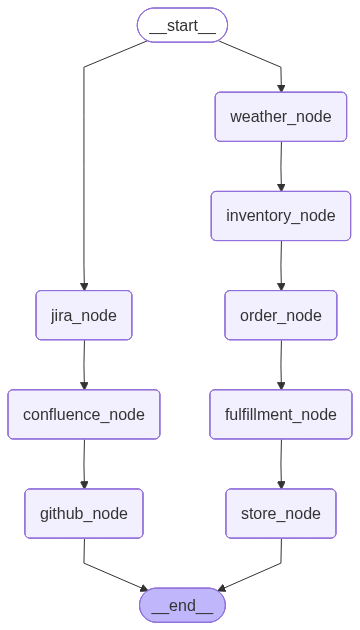

In [11]:
from IPython.display import display,Image
# Call the method to generate PNG bytes
png_bytes = graph.get_graph().draw_mermaid_png()

# Pass bytes directly
display(Image(data=png_bytes))

In [12]:
# -------------------------
# Run Example
# -------------------------
result1 = graph.invoke({"query": "What is the impact of weather on order fulfillment?"})
print("Use Case 1 Result:", result1)

result2 = graph.invoke({"query": "Explain Apple Pay implementation with tickets and commits"})
print("Use Case 2 Result:", result2)


Use Case 1 Result: {'query': 'What is the impact of weather on order fulfillment?'}
Use Case 2 Result: {'query': 'Explain Apple Pay implementation with tickets and commits'}
